In [6]:
import numpy as np
from nbodykit.lab import cosmology

cosmo = cosmology.Cosmology()
print("original sigma8 = %.4f" % cosmo.sigma8)


original sigma8 = 0.8380


In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
from nbodykit.lab import *
from nbodykit import style, setup_logging

import matplotlib.pyplot as plt
plt.style.use(style.notebook)

In [9]:
setup_logging() # turn on logging to screen

In [10]:
redshift = 0.

[ 000080.11 ]   0: 11-11 08:28  LogNormalCatalog INFO     Growth Rate is 0.524178
[ 000080.11 ]   0: 11-11 08:28  LogNormalCatalog INFO     Generating whitenoise
[ 000082.44 ]   0: 11-11 08:28  LogNormalCatalog INFO     Write noise generated
[ 000083.20 ]   0: 11-11 08:28  LogNormalCatalog INFO     Displacement computed in fourier space
[ 000083.62 ]   0: 11-11 08:28  LogNormalCatalog INFO     Overdensity computed in configuration space: std = 1.9218193604393587
[ 000084.72 ]   0: 11-11 08:28  LogNormalCatalog INFO     Displacement computed in configuration space: std = [5.756886546241712, 5.728577887596346, 5.8829117116883145]
[ 000084.74 ]   0: 11-11 08:28  LogNormalCatalog INFO     gaussian field is generated
[ 000084.85 ]   0: 11-11 08:28  LogNormalCatalog INFO     Lognormal transformation done
[ 000085.58 ]   0: 11-11 08:28  LogNormalCatalog INFO     Poisson sampling done, total number of objects is 2999134
[ 000088.24 ]   0: 11-11 08:28  LogNormalCatalog INFO     catalog produced

<class 'pmesh.pm.RealField'>
mean of 1+delta =  1.0000008
min of 1+delta =  0.0
max of 1+delta =  36.755074


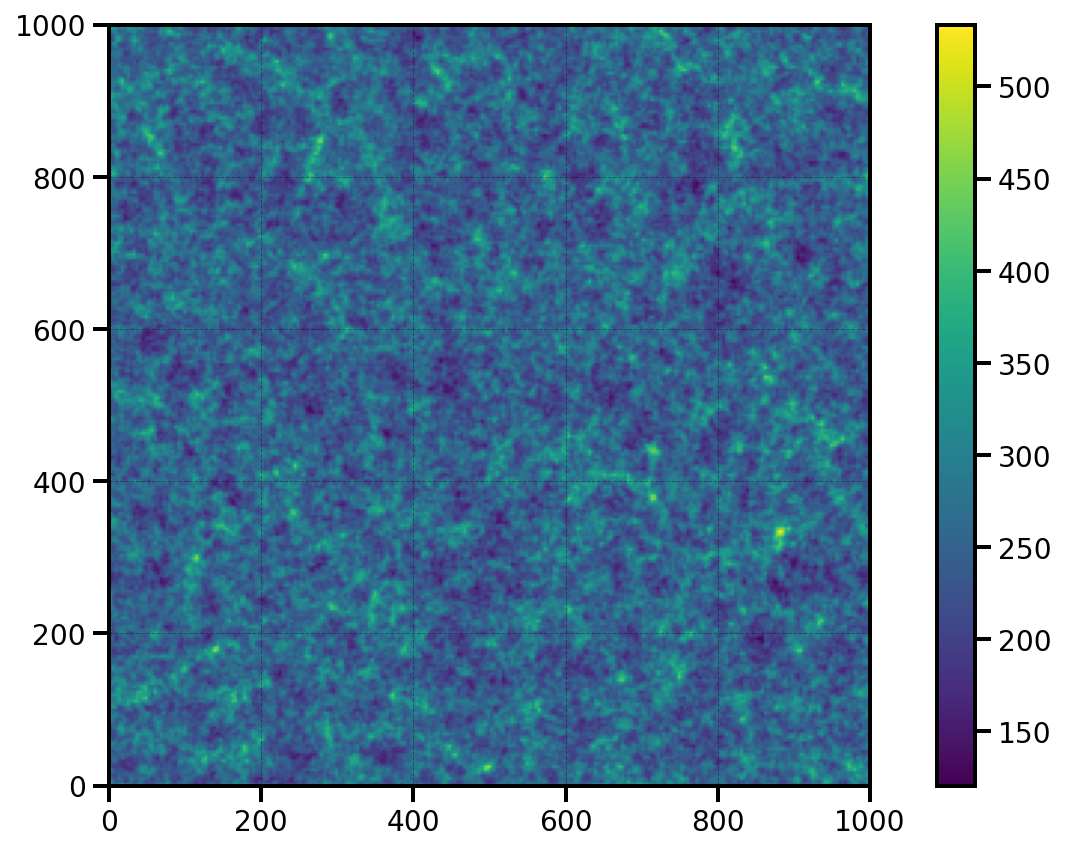

In [11]:
Plin = cosmology.LinearPower(cosmo, redshift, transfer='EisensteinHu')
cat = LogNormalCatalog(Plin=Plin, nbar=3e-3, BoxSize=1000., Nmesh=256, bias=1.0, seed=42)
mesh = cat.to_mesh(window='tsc')
one_plus_delta_lcdm_ref = mesh.paint(mode='real')
print(type(one_plus_delta_lcdm_ref))
print("mean of 1+delta = ", one_plus_delta_lcdm_ref.value.mean())
print("min of 1+delta = ", one_plus_delta_lcdm_ref.value.min())
print("max of 1+delta = ", one_plus_delta_lcdm_ref.value.max())
plt.imshow(one_plus_delta_lcdm_ref.preview(axes=[0,1]),extent=(0,1000,0,1000))
plt.colorbar()
plt.show()
cosmo = cosmology.Cosmology()  

In [12]:
one_plus_delta_lcdm_ref.preview(axes=[0,1])

array([[303.76352, 292.91986, 302.15323, ..., 277.81848, 236.63425,
        283.4205 ],
       [333.97156, 351.01172, 312.8021 , ..., 260.98752, 218.8169 ,
        262.37448],
       [290.16974, 283.29248, 297.89392, ..., 218.36987, 219.1539 ,
        248.80827],
       ...,
       [289.80743, 231.59497, 229.51682, ..., 304.81616, 299.95853,
        294.59143],
       [335.51044, 275.26343, 217.14638, ..., 281.67175, 325.24585,
        344.57385],
       [333.7829 , 279.3564 , 259.33807, ..., 219.23576, 257.2937 ,
        304.7983 ]], dtype=float32)

[ 000034.31 ]   0: 11-10 21:32  MeshSource      INFO     field: FieldMesh() painting done


<BinnedStatistic: dims: (k: 159), variables: ('k', 'power', 'modes')>


(0.01, 0.6)

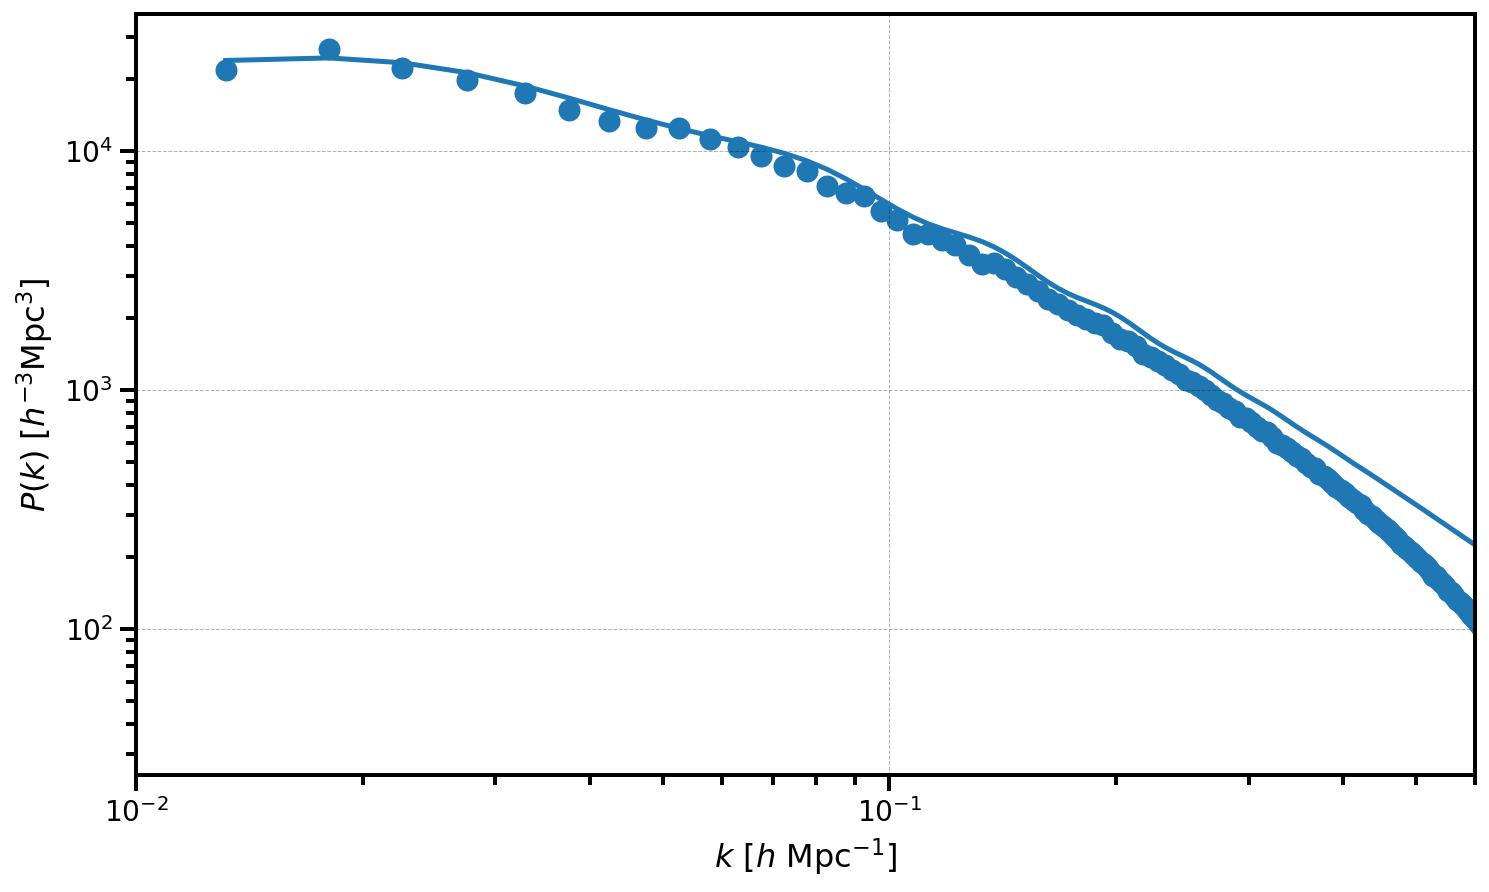

In [7]:
r = FFTPower(one_plus_delta_lcdm_ref, mode='1d', dk=5*1e-3, kmin=1e-2)
# the result is stored at "power" attribute
Pk = r.power
print(Pk)
# print the shot noise subtracted P(k)
plt.scatter(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'])
plt.loglog(Pk['k'], Plin(Pk['k']))

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
plt.xlim(0.01, 0.6)

In [8]:
catalogo_spettri = {}
catalogo_spettri['1'] = Pk

spettri_lineari = {}
spettri_lineari['1'] = Plin(Pk['k'])

[ 000052.19 ]   0: 09-12 09:46  LogNormalCatalog INFO     Growth Rate is 0.487252
[ 000052.19 ]   0: 09-12 09:46  LogNormalCatalog INFO     Generating whitenoise
[ 000054.55 ]   0: 09-12 09:46  LogNormalCatalog INFO     Write noise generated
[ 000055.28 ]   0: 09-12 09:46  LogNormalCatalog INFO     Displacement computed in fourier space
[ 000055.65 ]   0: 09-12 09:46  LogNormalCatalog INFO     Overdensity computed in configuration space: std = 0.6520359432399838
[ 000056.68 ]   0: 09-12 09:46  LogNormalCatalog INFO     Displacement computed in configuration space: std = [3.7156513030305858, 3.534674815068397, 3.8191435416016275]
[ 000056.69 ]   0: 09-12 09:46  LogNormalCatalog INFO     gaussian field is generated
[ 000056.79 ]   0: 09-12 09:46  LogNormalCatalog INFO     Lognormal transformation done
[ 000057.48 ]   0: 09-12 09:46  LogNormalCatalog INFO     Poisson sampling done, total number of objects is 2999134
[ 000060.23 ]   0: 09-12 09:46  LogNormalCatalog INFO     catalog produce

<class 'pmesh.pm.RealField'>
mean of 1+delta =  1.0000008
min of 1+delta =  0.0
max of 1+delta =  17.262966


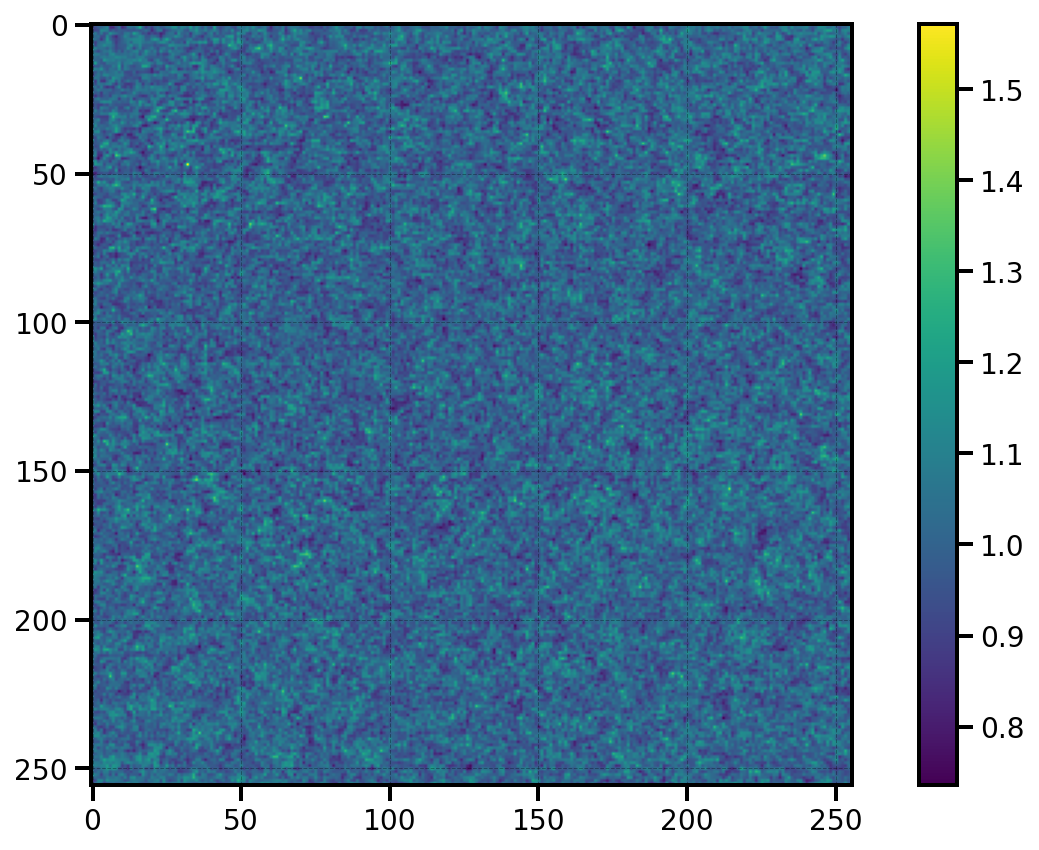

[ 000063.48 ]   0: 09-12 09:46  MeshSource      INFO     field: FieldMesh() painting done
[ 000064.89 ]   0: 09-12 09:46  LogNormalCatalog INFO     Growth Rate is 0.815176
[ 000064.89 ]   0: 09-12 09:46  LogNormalCatalog INFO     Generating whitenoise
[ 000067.25 ]   0: 09-12 09:47  LogNormalCatalog INFO     Write noise generated
[ 000068.00 ]   0: 09-12 09:47  LogNormalCatalog INFO     Displacement computed in fourier space
[ 000068.41 ]   0: 09-12 09:47  LogNormalCatalog INFO     Overdensity computed in configuration space: std = 1.5844175073462958
[ 000069.46 ]   0: 09-12 09:47  LogNormalCatalog INFO     Displacement computed in configuration space: std = [4.3415150553077515, 4.331552628682795, 4.4268287974468015]
[ 000069.47 ]   0: 09-12 09:47  LogNormalCatalog INFO     gaussian field is generated
[ 000069.57 ]   0: 09-12 09:47  LogNormalCatalog INFO     Lognormal transformation done
[ 000070.27 ]   0: 09-12 09:47  LogNormalCatalog INFO     Poisson sampling done, total number of ob

<class 'pmesh.pm.RealField'>
mean of 1+delta =  1.0000006
min of 1+delta =  0.0
max of 1+delta =  29.067137


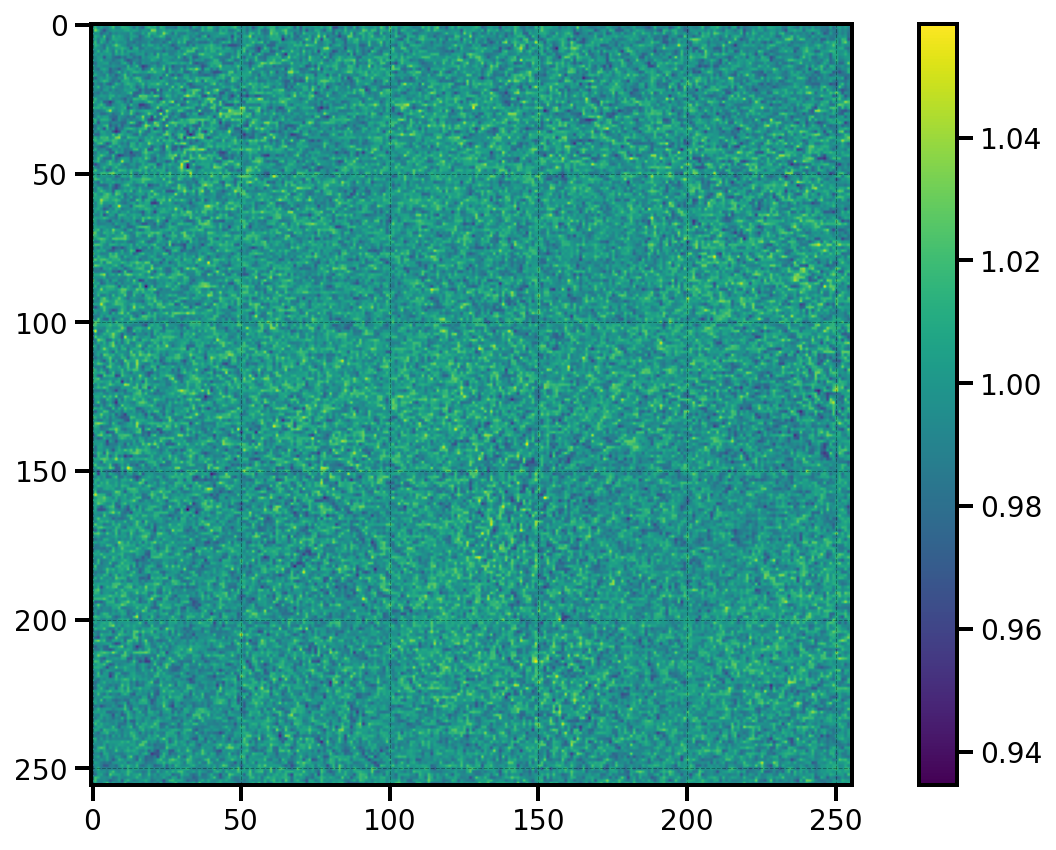

[ 000076.27 ]   0: 09-12 09:47  MeshSource      INFO     field: FieldMesh() painting done


In [11]:
cosmo_omega = [0.3,1.2]
for omega in cosmo_omega:
    cosmo = cosmo.match(Omega0_m=cosmo.Omega0_m*omega)#cosmo.Omega0_cdm = omega
    Plin = cosmology.LinearPower(cosmo, redshift, transfer='EisensteinHu')
    cat = LogNormalCatalog(Plin=Plin, nbar=3e-3, BoxSize=1000., Nmesh=256, bias=1.0, seed=42)
    mesh = cat.to_mesh(window='tsc')
    one_plus_delta = mesh.paint(mode='real')
    print(type(one_plus_delta))
    print("mean of 1+delta = ", one_plus_delta.value.mean())
    print("min of 1+delta = ", one_plus_delta.value.min())
    print("max of 1+delta = ", one_plus_delta.value.max())
    plt.imshow(one_plus_delta.preview(axes=[0,1])/one_plus_delta_lcdm_ref.preview(axes=[0,1]))
    plt.colorbar()
    plt.show()
    
    r = FFTPower(one_plus_delta, mode='1d', dk=0.001, kmin=np.pi/1000)
    # the result is stored at "power" attribute
    Pk = r.power
    catalogo_spettri[str(omega)] = Pk
    spettri_lineari[str(omega)] = Plin(Pk['k'])
    #print(Pk)
    # print the shot noise subtracted P(k)
    #plt.scatter(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'])
    #plt.loglog(Pk['k'], Plin(Pk['k']))
    # format the axes
    #plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
    #plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
    #plt.xlim(0.01, 0.6)
    
    cosmo = cosmology.Cosmology()  

In [12]:
catalogo_spettri

{'1': <BinnedStatistic: dims: (k: 159), variables: ('k', 'power', 'modes')>,
 '0.3': <BinnedStatistic: dims: (k: 801), variables: ('k', 'power', 'modes')>,
 '1.2': <BinnedStatistic: dims: (k: 801), variables: ('k', 'power', 'modes')>}

In [13]:
spettri_lineari

{'1': array([13448.85365352, 13782.01979042, 13158.04595303, 11957.45901217,
        10524.58525864,  9363.81588687,  8373.09370818,  7579.57224972,
         6991.7786067 ,  6517.49945198,  6140.84113645,  5836.9257461 ,
         5509.39728802,  5121.13165637,  4714.52283969,  4302.56425163,
         3903.50945612,  3533.49011579,  3217.41133917,  2970.06029037,
         2791.34541051,  2662.14037301,  2556.85777314,  2457.72838775,
         2352.78283904,  2237.61758005,  2108.90327488,  1967.78032836,
         1830.58681672,  1703.75365014,  1590.86325748,  1499.71009434,
         1429.31655278,  1373.86501948,  1327.37080345,  1284.25608768,
         1240.72642474,  1192.85830695,  1139.59645625,  1083.46939471,
         1026.78167181,   974.0305448 ,   926.37494023,   884.31351309,
          848.95235761,   819.36785676,   794.06894303,   770.38815931,
          746.37996065,   721.87840546,   696.5109304 ,   670.07199573,
          643.32608117,   617.9882102 ,   594.10259348,   5

(0.01, 0.6)

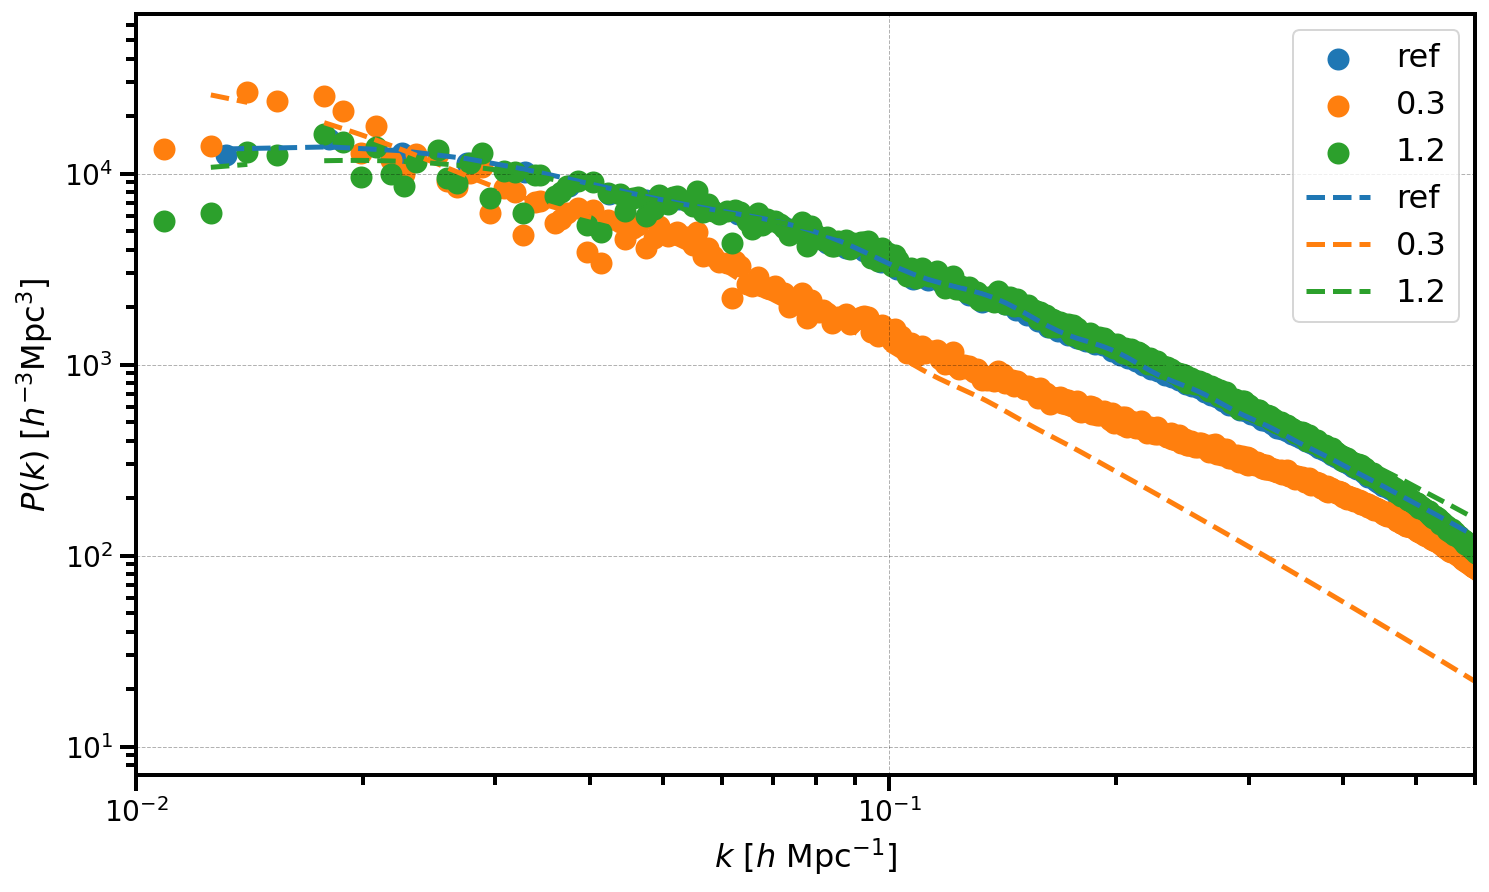

In [14]:
plt.scatter(catalogo_spettri['1']['k'], catalogo_spettri['1']['power'].real - catalogo_spettri['1'].attrs['shotnoise'],label = 'ref')
plt.scatter(catalogo_spettri['0.3']['k'], catalogo_spettri['0.3']['power'].real - catalogo_spettri['0.3'].attrs['shotnoise'],label='0.3')
plt.scatter(catalogo_spettri['1.2']['k'], catalogo_spettri['1.2']['power'].real - catalogo_spettri['1.2'].attrs['shotnoise'],label='1.2')

plt.loglog()

plt.loglog(catalogo_spettri['1']['k'], spettri_lineari['1'],label='ref',ls='--')
plt.loglog(catalogo_spettri['0.3']['k'],spettri_lineari['0.3'] ,label='0.3',ls='--')
plt.loglog(catalogo_spettri['1.2']['k'],spettri_lineari['1.2'] ,label='1.2',ls='--')

plt.legend()
# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
plt.xlim(0.01, 0.6)